In [1]:
import sys
import os
from pathlib import Path
sys.path.append(str(Path.cwd().parent))

In [2]:
from hydro_stats import *

<h2>Statystyki</h2>


Number of observations: 64
WWQ: 1340.0	 SWQ: 124.17	 NWQ: 20.9
WSQ: 20.6	 SSQ: 12.77	 NSQ: 7.1
WNQ: 7.8	 SNQ: 3.95	 NNQ: 1.16

      winter_min  winter_mean  winter_max  summer_min  summer_mean  \
mean       3.948       13.750      89.175       3.952       11.814   
std        1.349        3.645      47.281       1.613        4.887   
min        1.160        6.320      25.800       1.240        4.110   
25%        3.140       10.900      54.950       2.915        7.915   
50%        3.790       13.700      78.950       4.180       10.900   
75%        4.690       16.850     102.500       4.788       14.950   
max        7.800       21.200     244.000       7.700       23.800   

      summer_max  year_mean  year_max  year_min  
mean     159.167     12.766   181.989     3.297  
std      189.013      3.257   179.867     1.269  
min       20.900      7.100    38.900     1.160  
25%       59.625     10.350    90.200     2.352  
50%      109.500     12.300   142.000     3.220  
75%      18

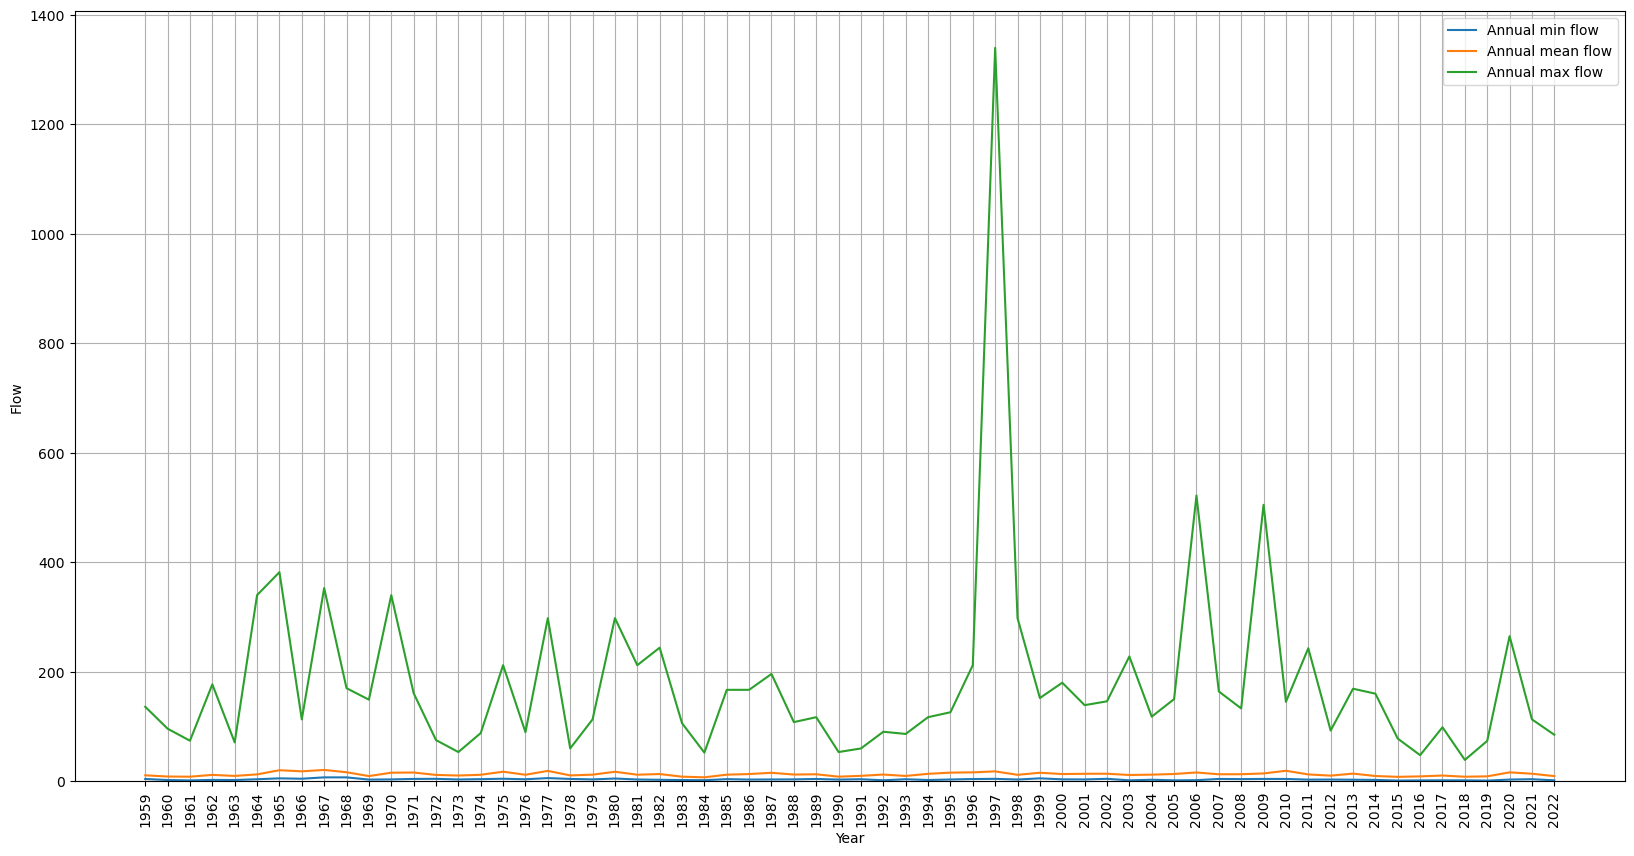

In [4]:
# Kłodzko
end = 2023
start = 1959  # end-30
df = basic_stats(analyse_period(start, end, 150160180, "Q"), 'Q')

# plot data
plt.figure(figsize=(20, 10))
sns.lineplot(data=df, x="year", y="year_min", label="Annual min flow")
sns.lineplot(data=df, x="year", y="year_mean", label="Annual mean flow")
sns.lineplot(data=df, x="year", y="year_max", label="Annual max flow")
plt.xlabel("Year")
plt.ylabel("Flow")
plt.xticks(rotation=90, horizontalalignment="center")
plt.ylim(0)
plt.grid(True)
plt.legend()
plt.show()

Poprawność obliczeń prawdopodobieństw przewyszenia przepływów nie została zweryfikowana! Dotyczy to zarówno rozkładu logarytmiczno-normalnego i GEV.

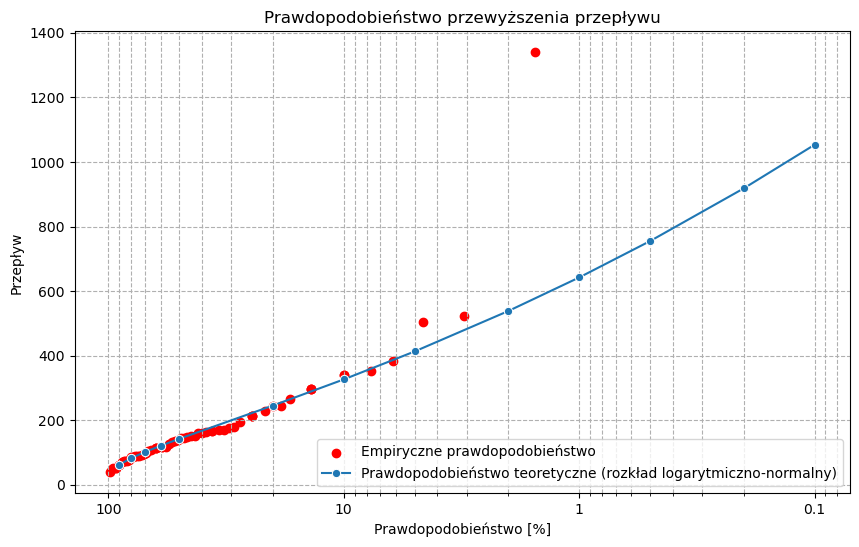

In [5]:
log_normal_analysis = LogNormalAnalysis(df)
log_normal_analysis.plot()

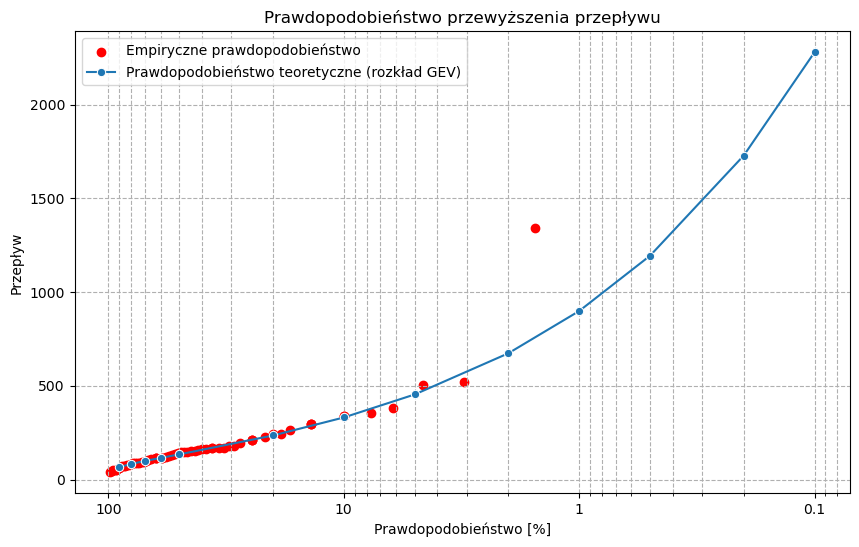

In [6]:
gen_extreme_analysis = GenExtremeAnalysis(df)
gen_extreme_analysis.plot()